In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [ ]:
def graph(col):
    plt.figure(figsize=(24,8)) 
    plt.subplot(1, 3, 1)
    plt.boxplot(df[col])
    plt.title(col)
    plt.subplot(1, 3, 2)
    plt.hist(df[col])
    plt.title(col)
    plt.subplot(1, 3, 3)
    plt.scatter(df[col], df.rating_avg)
    plt.xlabel(col)
    plt.ylabel('rating_avg')
    plt.show()

In [2]:
df = pd.read_csv("data/movies_ratings.txt")
df.columns

Index(['Unnamed: 0', 'rating_avg', 'belongs_to_collection', 'budget',
       'popularity', 'Western', 'Romance', 'Adventure', 'TV Movie', 'Foreign',
       ...
       'zu_lan', 'num_languages', 'Canceled', 'In Production', 'Planned',
       'Post Production', 'Released', 'Rumored', 'tagline_len', 'video_int'],
      dtype='object', length=384)

In [11]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
res = pd.DataFrame()
res['alpha'] = alphas
mae = []
cv_score = []
num = []

for alpha in alphas:
    # lasso feature selection
    clf = linear_model.Lasso(alpha=alpha)
    X = df.drop(columns=['rating_avg', 'Unnamed: 0', 'revenue', 'vote_count', 'vote_average', 'Released', 'popularity'])
    y = df.rating_avg
    mdl = clf.fit(X, y)
    coef = clf.coef_
    features = X.columns[coef!=0]
    X = X[features]
    num.append(len(features))
    
    # linear regression
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_test = linreg.predict(X_test)
    
    # mean absolute error
    test_mse = mean_squared_error(y_test, y_hat_test)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    mae.append(test_mae)
    
    # cross validation scores
    cv_5_results = cross_val_score(linreg, 
                                   X, 
                                   y, 
                                   cv=5, 
                                   scoring="neg_mean_squared_error")
    cv_score.append(np.mean(cv_5_results))
    
res['cv_score'] = cv_score
res['mae'] = mae
res['num of features'] = num
res

C:\Users\lucyg\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2716.934520826761, tolerance: 0.6626406772669897
  positive)


,alpha,cv_score,mae,num of features
0,0.00001,-0.691393,0.587970,265
1,0.00010,-0.675799,0.619013,184
2,0.00100,-0.658382,0.616919,64
3,0.01000,-0.671550,0.595838,13
4,0.10000,-0.732092,0.666161,4
5,1.00000,-0.734173,0.645140,3
6,10.00000,-0.741009,0.666588,2


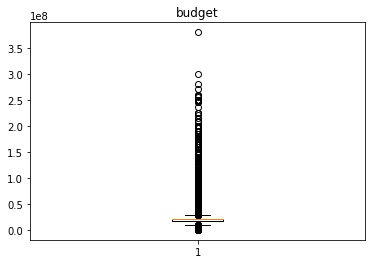

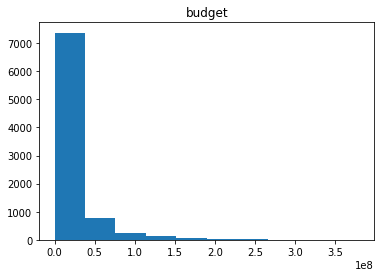

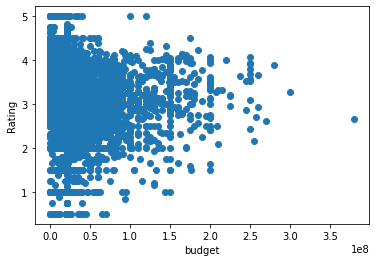

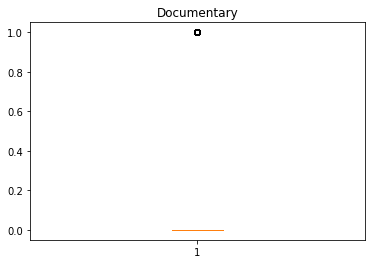

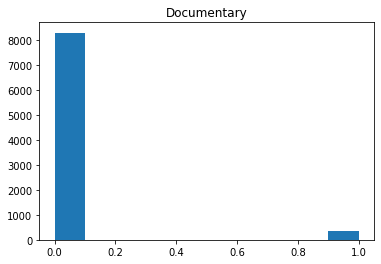

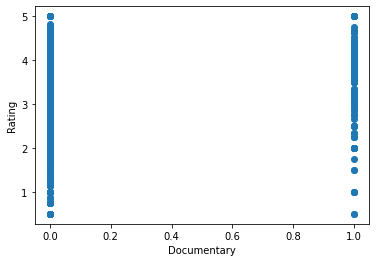

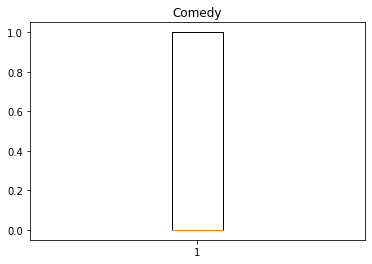

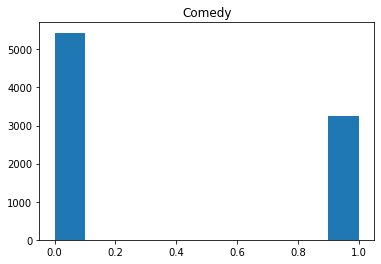

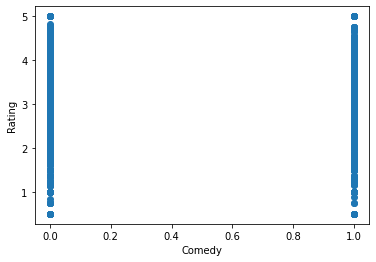

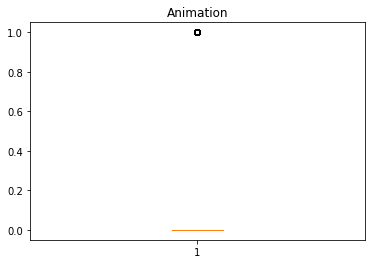

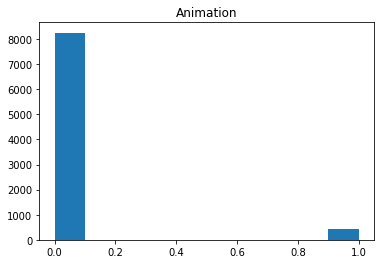

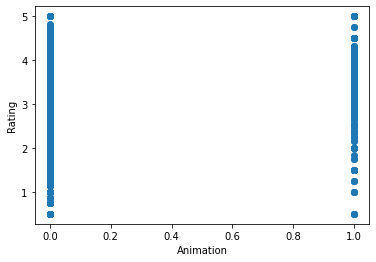

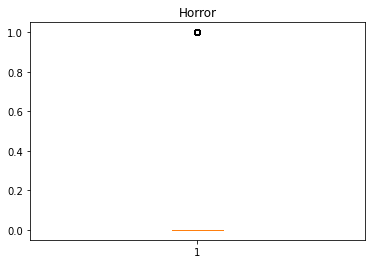

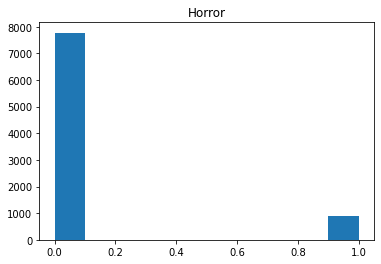

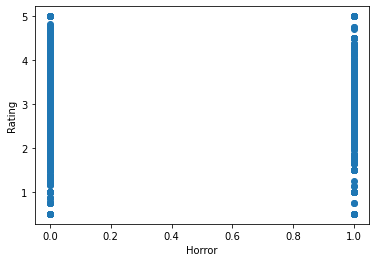

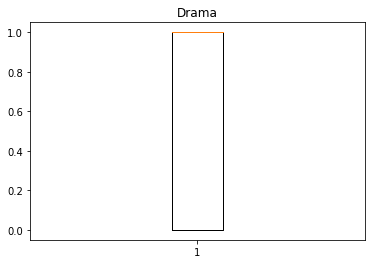

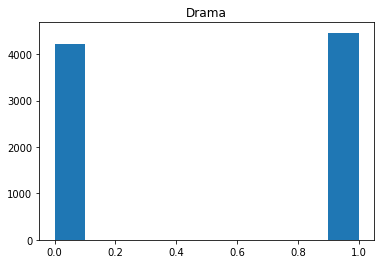

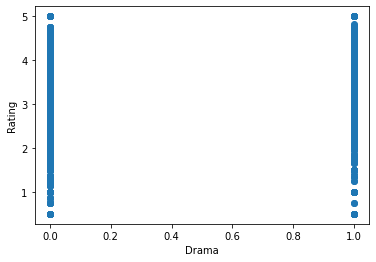

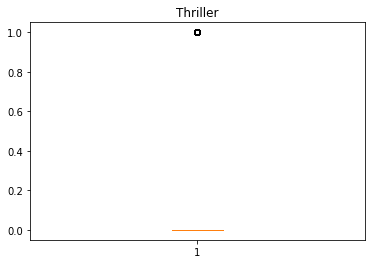

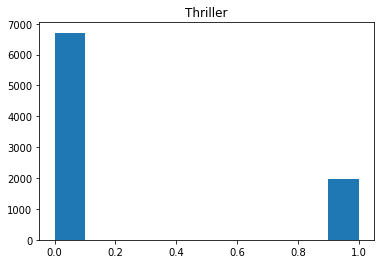

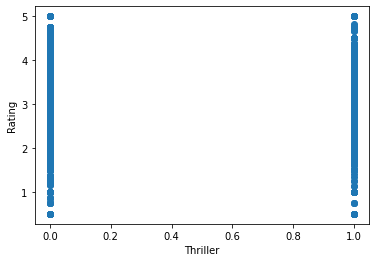

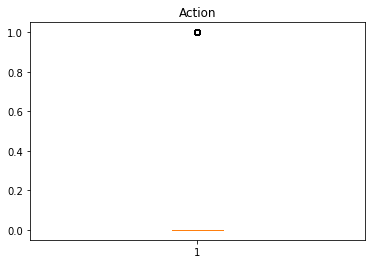

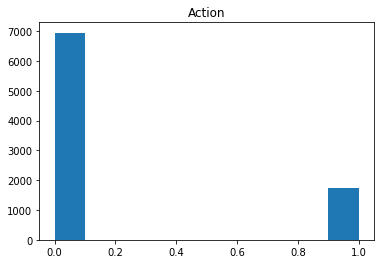

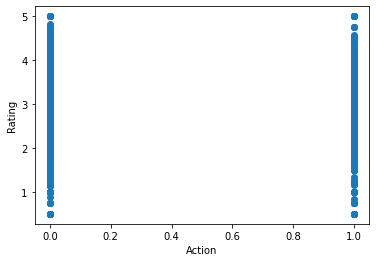

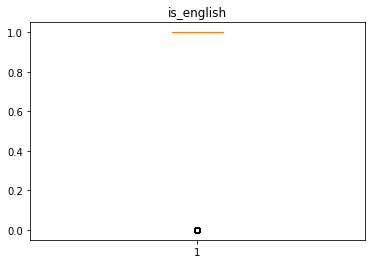

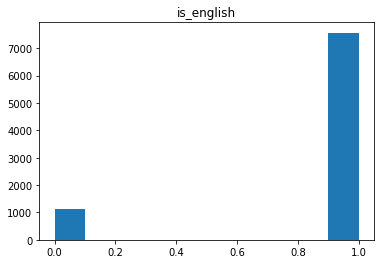

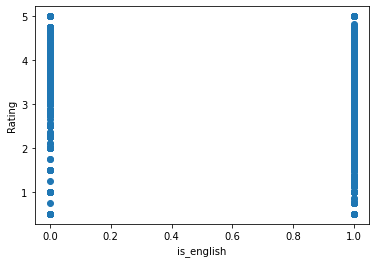

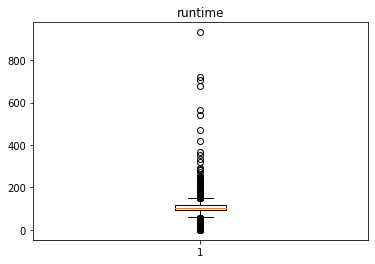

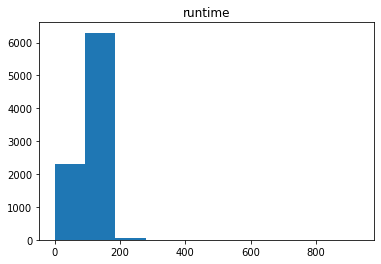

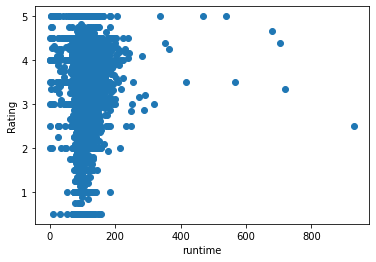

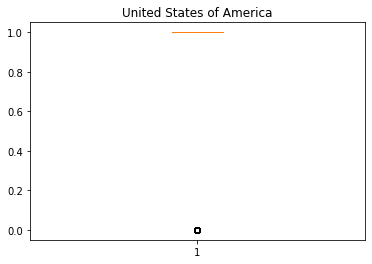

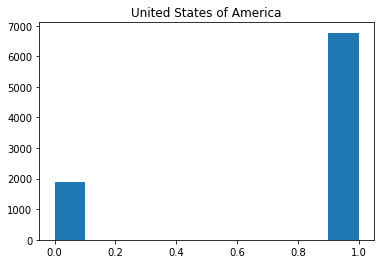

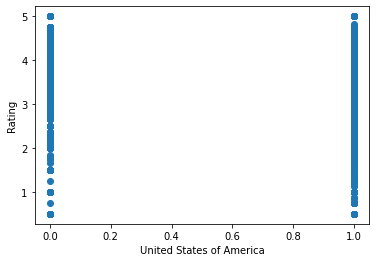

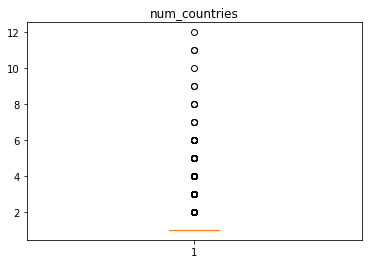

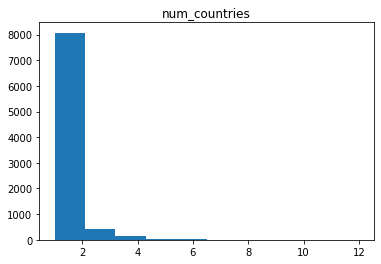

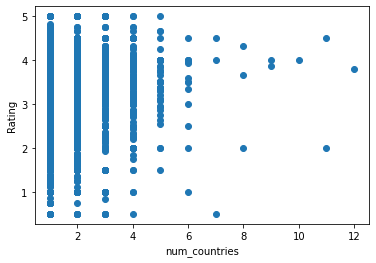

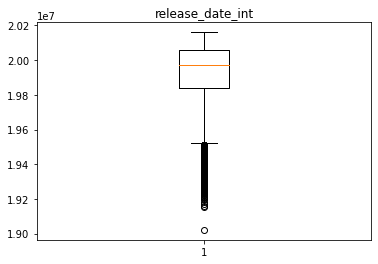

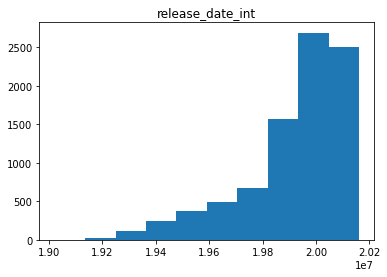

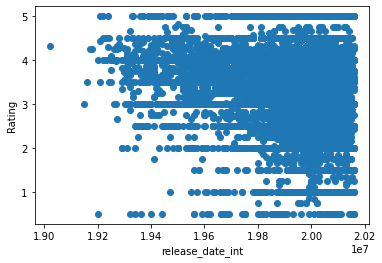

In [19]:
# lasso feature selection
clf = linear_model.Lasso(alpha=0.01)
X = df.drop(columns=['rating_avg', 'Unnamed: 0', 'revenue', 'vote_count', 'vote_average', 'Released', 'popularity'])
y = df.rating_avg
mdl = clf.fit(X, y)
coef = clf.coef_
features = X.columns[coef!=0]

for col in features:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    plt.scatter(df[col], df.rating_avg)
    plt.xlabel(col)
    plt.ylabel('Rating')
    plt.show()



In [25]:
clf = linear_model.Lasso(alpha=0.001)
X = df.drop(columns=['rating_avg', 'Unnamed: 0', 'revenue', 'vote_count', 'vote_average', 'Released', 'popularity'])
y = df.rating_avg
mdl = clf.fit(X, y)
coef = clf.coef_
features = X.columns[coef!=0]
new_df = X[features]
new_df['Rating'] = y
new_df.shape

C:\Users\lucyg\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(8679, 65)

In [26]:

new_df.to_csv("data/movies_filtered.csv")